In [1]:
#Import Packages
##Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from scipy.signal import find_peaks

In [25]:
#Get Data
data = np.array([[0.2, 8.90, 0.2],
                [5, 4.88, 0.1],
                [10, 2.40, 0.2],
                [15, 0.88, 0.04],
                [20, 0.44, 0.04],
                [25, 0.20, 0.015],
                [30, 0.15, 0.02]])


data

array([[2.00e-01, 8.90e+00, 2.00e-01],
       [5.00e+00, 4.88e+00, 1.00e-01],
       [1.00e+01, 2.40e+00, 2.00e-01],
       [1.50e+01, 8.80e-01, 4.00e-02],
       [2.00e+01, 4.40e-01, 4.00e-02],
       [2.50e+01, 2.00e-01, 1.50e-02],
       [3.00e+01, 1.50e-01, 2.00e-02]])

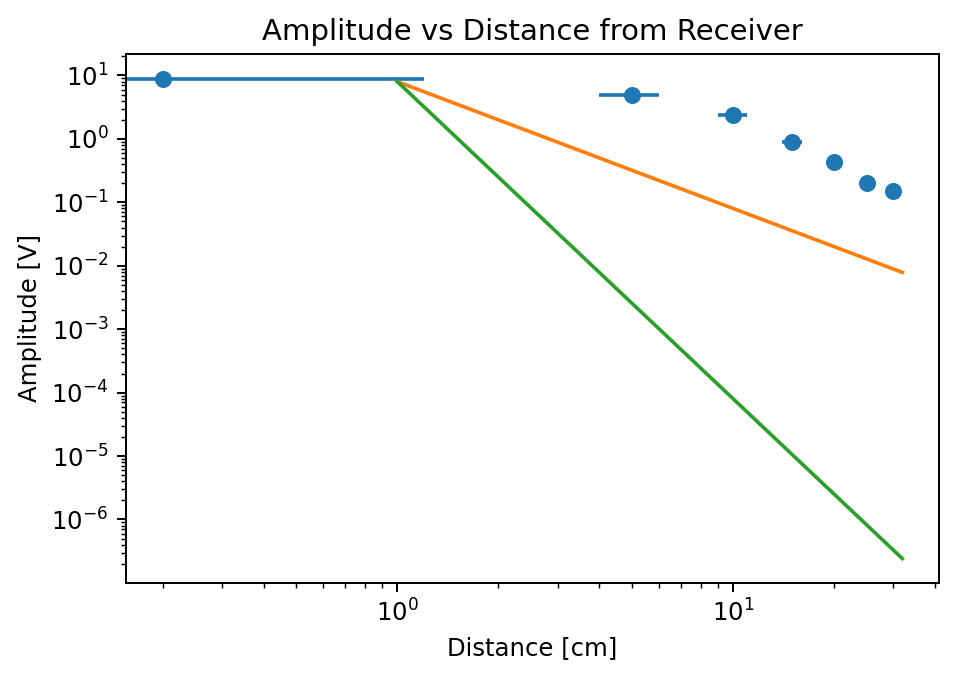

In [27]:
plt.figure(dpi=175)
plt.title("Amplitude vs Distance from Receiver")
plt.xlabel("Distance [cm]")
plt.ylabel("Amplitude [V]")

plt.errorbar(data[:,0],data[:,1], xerr=1, yerr=data[:,2], fmt="o")

x = np.arange(1,32.0,.1)
plt.plot(x, 8*(x)**(-2))
plt.plot(x, 8*(x)**(-5))

plt.xscale("log")
plt.yscale("log")

In [ ]:
%%time
def gauss(x,mu=0,sigma=1):
    return np.exp(-((mu-x)**2/(2*(sigma)**2)))

def linear(x, a,b):
    return a*x + b

def quadratic(x, a,b,c):
    return a*x**2 + b*x + c

def qubic(x, a,b,c,d):
    return a*x**3 + b*x**2 + c*x + d

def linear_sin(x, a,b,c,d,e):
    return a*x + b*np.sin(c*x+d) + e

func = qubic

##Get Hist
plt.figure(dpi=150)
plt.suptitle(f"Initial Fit")
plt.subplot(2, 2, 1)
plt.xlabel("$V_{in}$")
plt.ylabel("$V_{out}$")

keeps = (raw_data1["v_in"] > .4) & (raw_data1["v_in"] < 1.4)

v_in = raw_data1["v_in"][keeps]
v_out = raw_data1["v_out"][keeps]

plt.plot(v_in, v_out, lw=.8)

errors = v_out.values*0 + .001

#pars, cov = scipy.optimize.curve_fit(single_Gauss, frequency.values, out_in.values, #maxfev=3*10**5, sigma=errors,
#                                     p0=[3,460,20, 1],
#                                     bounds=([0.01,380,1, 0],
#                                             [5,520,200, 1.5]))
pars, cov = scipy.optimize.curve_fit(func, v_in.values, v_out.values, maxfev=3*10**5, sigma=errors,
                                     p0=[0.01,.1,.8,1],#1], #[3,460,20, 1],
                                     #bounds=([0.01,380,1, 0],
                                     #        [5,520,200, 1.5]))
                                    )
#Mean Lines
#plt.vlines(pars[-2],1,5, label=f"{pars[-2]:.1f} ({np.sqrt(cov.diagonal())[-2]:.1f})", color="blue", lw=0.5)

#plt.legend(title="Peaks", prop={"size":6})

#Plot Fit
plt.subplot(2, 2, 2)
x = v_in.values#np.arange(.2,1.5,0.1)
#shows = (np.arange(0,len(wavelength),1)%10 == 0)

plt.errorbar(v_in.values, 
             v_out.values, yerr=errors/10, ms=.2, elinewidth=.1, alpha=0.5, label="Data")
plt.plot(x, func(x, *pars), color="red", lw=.8, alpha=0.5, label=f"Fit: ({pars[-2]:.2f})")
plt.legend(prop={"size":8})
#plt.xscale("log")
#plt.set_xticks(np.arange(300,901,50), minor=1)

print(pars)
print(np.sqrt(cov.diagonal()))
print(np.sqrt(cov.diagonal())/np.abs(pars)*100)

#Residuals
residuals = (v_out.values-func(v_in.values, *pars))/errors
plt.subplot(2, 2, 3)
plt.title("Residuals")
plt.plot(v_in.values, residuals)#, s=1)

#Pull Dist
plt.subplot(2, 2, 4)
plt.title("Pull Dist")
red = "{red}"
plt.hist(residuals, 20, label=f"$\chi_{red}^2$ = {np.sum(residuals**2)/len(residuals):.2f}")
plt.legend(prop={"size":8})

plt.tight_layout()
plt.savefig(f"Plots/SiDiode_Forward_Positive_Fit.pdf")
plt.show()